![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [45]:
# Importing pandas and matplotlib
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [46]:
# Load the csv file and store as netflix_df
netflix_df = pd.read_csv('netflix_data.csv')
# Check columns of dataframe
netflix_df.columns
# Count Null data if any
percent_null=netflix_df.isnull().sum()
# % of data that is null
percent_data = (percent_null/len(netflix_df))*100
print(percent_data)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
duration         0.000000
description      0.000000
genre            0.000000
dtype: float64


In [47]:
# display the dataframe
netflix_df2 = netflix_df.copy()
netflix_df2 = netflix_df2.head()
display(netflix_df2)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [48]:
#Filter the data to remove TV shows, store as netflix_subset
netflix_subset = netflix_df[netflix_df['type']!='TV Show']
print(netflix_subset.head())

  show_id  ...          genre
1      s2  ...         Dramas
2      s3  ...  Horror Movies
3      s4  ...         Action
4      s5  ...         Dramas
6      s7  ...  Horror Movies

[5 rows x 11 columns]


In [49]:
# Save to netflix_movies with only the columns "title", "country", "genre", "release_year", "duration"
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]
#check if dataframe have the correct columns
print(netflix_movies.columns)

Index(['title', 'country', 'genre', 'release_year', 'duration'], dtype='object')


In [50]:
# Filter netflix_movies to find movies <60mins, save as short_movies
short_movies = netflix_movies[netflix_movies['duration']<60]
display(short_movies)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
7692,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
7718,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54
7771,Zion,United States,Documentaries,2018,12


In [54]:

  # Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".

# create an empty list colors to store diff color values 
colors = []
#iterating through the dataframe
for index, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('Blue')
        print('Children')
    elif row['genre'] == 'Documentaries':
        colors.append('Green')
        print('Documentaries')
    elif row['genre'] == 'Stand-Up':
        colors.append('Yellow')
        print('Stand-Up')
    else:
        colors.append('Red')
        print('Other')  
    


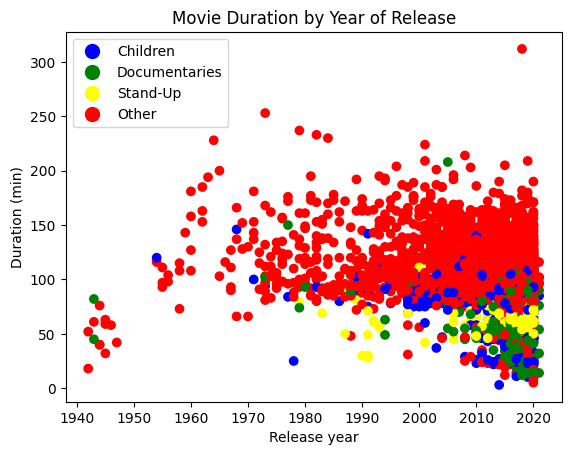

In [52]:
# creating a scatter plot using matplotlib
fig, ax = plt.subplots()

# plotting movie duration by release year with colors based on genre
ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, label=['Children',"Documentaries","Stand-Up","Other"])

#fine-tune the graph
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# creating a legend with correct colors and labels
# The 'handles' argument gets the scatterplot points and their corresponding labels
handles = [plt.Line2D([], [], marker='o', linestyle='None', markersize=10, color=color) for color in ['Blue', 'Green', 'Yellow', 'Red']]
labels = ["Children", "Documentaries", "Stand-Up", "Other"]

plt.legend(handles=handles, labels=labels)
#display
plt.show()

In [53]:
# After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes", "no", or "maybe" to the variable answer
answer = 'maybe'